<div style="font-family: 'Arial', sans-serif; color: #333; max-width: 900px; margin: auto; line-height:1.6;">

  <!-- Cover Title -->
  <h1 style="text-align:center; color:#2c3e50; font-size:36px;">📱 Mobile Phones Market Analysis</h1>
  <hr style="border:1px solid #ddd; margin: 20px 0;">

  <!-- Author and Date -->
  <p style="text-align:center; font-size:16px; color:#555;">
    <strong>Author:</strong> Muhammad Abdullah &nbsp;&nbsp; | &nbsp;&nbsp; <strong>Date:</strong> November 2025
  </p>

  <!-- Goal -->
  <h2 style="color:#16a085;">🎯 Goal</h2>
  <p>Analyze mobile phone specifications, pricing, and user ratings to identify <strong>key features affecting ratings</strong> and provide actionable recommendations.</p>

  <!-- Overview -->
  <h2 style="color:#2980b9;">🔎 Overview</h2>
  <ul style="padding-left:20px; list-style-type: disc;">
    <li>📊 <strong>Rating distribution</strong> across price and brand.</li>
    <li>🔋 <strong>Impact of battery capacity</strong> on user satisfaction.</li>
    <li>💾 <strong>Effect of RAM, storage, and charging speed</strong> on ratings.</li>
    <li>💰 <strong>Price vs rating analysis</strong> to identify sweet spots for mid-range and high-end phones.</li>
    <li>🌟 Provide <strong>recommendations for phone manufacturers and marketers</strong>.</li>
  </ul>




### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


### Load the data

In [2]:
df = pd.read_csv("/kaggle/input/world-smartphone-market-2025/Global_Mobile_Prices_2025_Extended.csv")

### Top 5 rows of Data

In [3]:
df.head()

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


### Summary Statistics

In [4]:
df.describe()

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


### Checking Missing Data

In [5]:
df.isnull().sum()

brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64

No null values found

## 📊Price and Rating Binning

In this section, we convert the `price_usd` and `rating` columns into **categorical ranges** to make analysis easier.


In [6]:
# Define price bins and labels
price_bins = [0, 300, 500, 700, 900, 1200, 1500]
price_labels = ["0-300", "301-500", "501-700", "701-900", "901-1200", "1201-1500"]

# Convert price to ranges
df["price_range"] = pd.cut(df["price_usd"], bins=price_bins, labels=price_labels, include_lowest=True)

# Define granular rating bins and labels
rating_bins = [0, 3, 3.5, 4, 4.5, 5]
rating_labels = ["0-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
df["rating_range"] = pd.cut(df["rating"], bins=rating_bins, labels=rating_labels, include_lowest=True)



In [7]:
# Drop 'rating' and 'price_usd' columns
df = df.drop(['rating', 'price_usd'], axis=1)


## 📊 Distribution Analysis  
**📱 Count of phones per price range:**


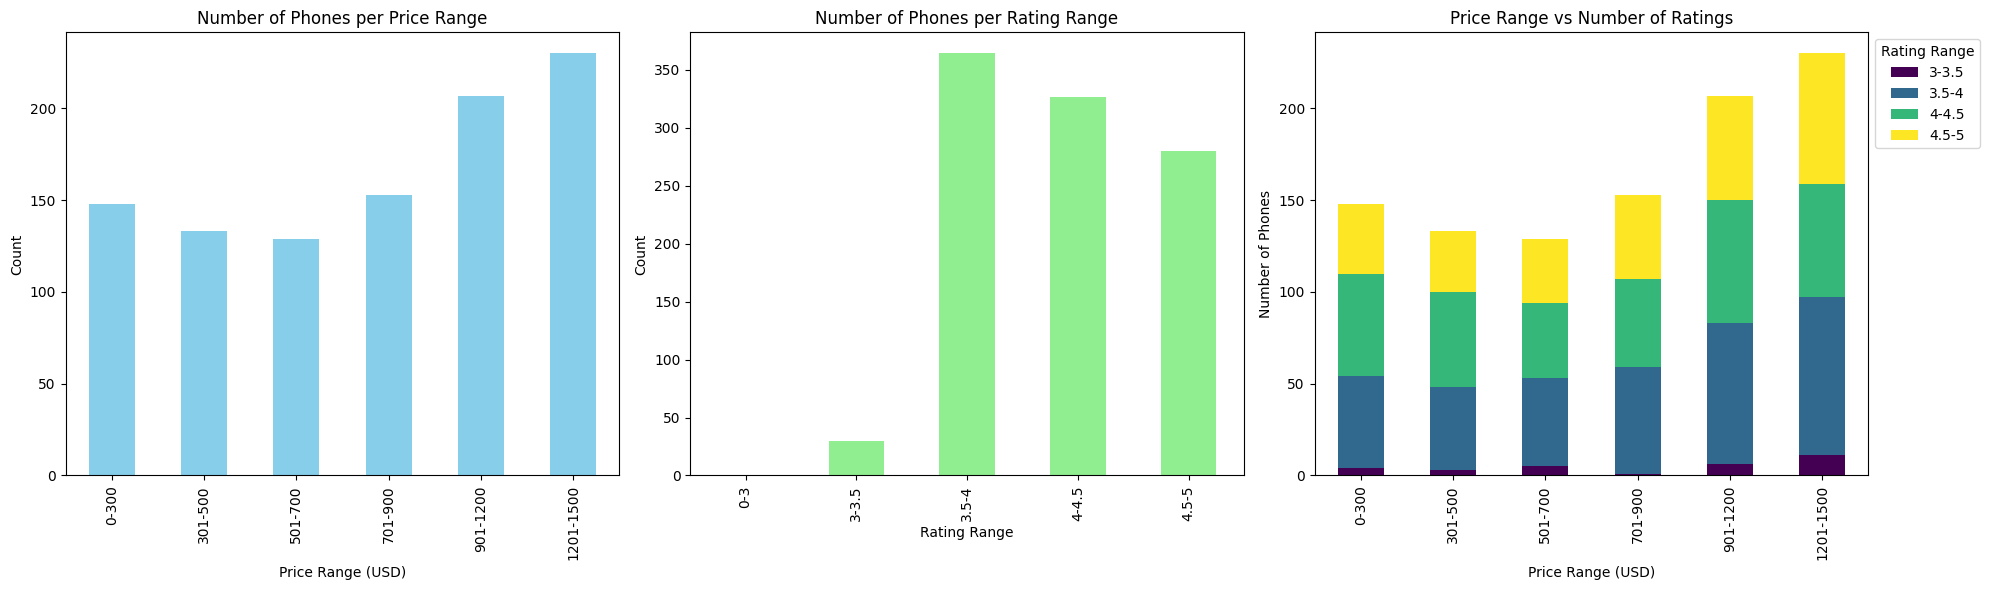

In [8]:
# Create figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# 1️⃣ Count of phones per price range
df['price_range'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title("Number of Phones per Price Range")
axes[0].set_xlabel("Price Range (USD)")
axes[0].set_ylabel("Count")

# 2️⃣ Count of phones per rating range
df['rating_range'].value_counts().sort_index().plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title("Number of Phones per Rating Range")
axes[1].set_xlabel("Rating Range")
axes[1].set_ylabel("Count")

# 3️⃣ Price range vs Number of Ratings
price_rating = pd.crosstab(df['price_range'], df['rating_range'])
price_rating.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title("Price Range vs Number of Ratings")
axes[2].set_xlabel("Price Range (USD)")
axes[2].set_ylabel("Number of Phones")
axes[2].legend(title="Rating Range", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()



## 🏷️ Brand Analysis
**⭐ Average rating per brand:**  

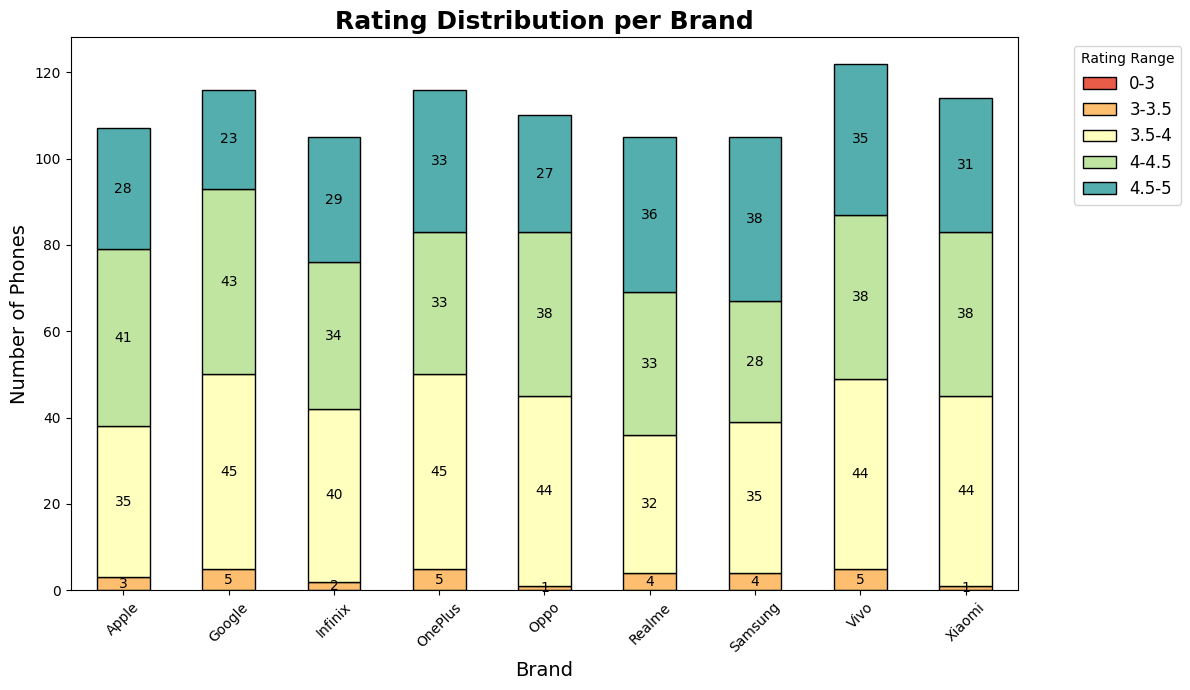

In [9]:
# Group by brand and rating_range
brand_rating = df.groupby('brand')['rating_range'].value_counts().unstack().fillna(0)

# Set a nice color palette
colors = sns.color_palette("Spectral", n_colors=len(brand_rating.columns))

# Plot stacked bar chart
brand_rating.plot(kind='bar', stacked=True, figsize=(12,7), color=colors, edgecolor='black')

# Add labels and title
plt.title("Rating Distribution per Brand", fontsize=18, fontweight='bold')
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Number of Phones", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Rating Range", bbox_to_anchor=(1.05, 1), fontsize=12)

# Add value labels on top of each stack
for i, brand in enumerate(brand_rating.index):
    bottom = 0
    for j, rating in enumerate(brand_rating.columns):
        value = brand_rating.loc[brand, rating]
        if value > 0:
            plt.text(i, bottom + value/2, int(value), ha='center', va='center', color='black', fontsize=10)
            bottom += value

plt.tight_layout()
plt.show()



## Feature vs Price Analysis  

**💾 RAM, 🗄️ Storage, 📸 Camera, 🔋 Battery vs 🏷️ Price Range:**  


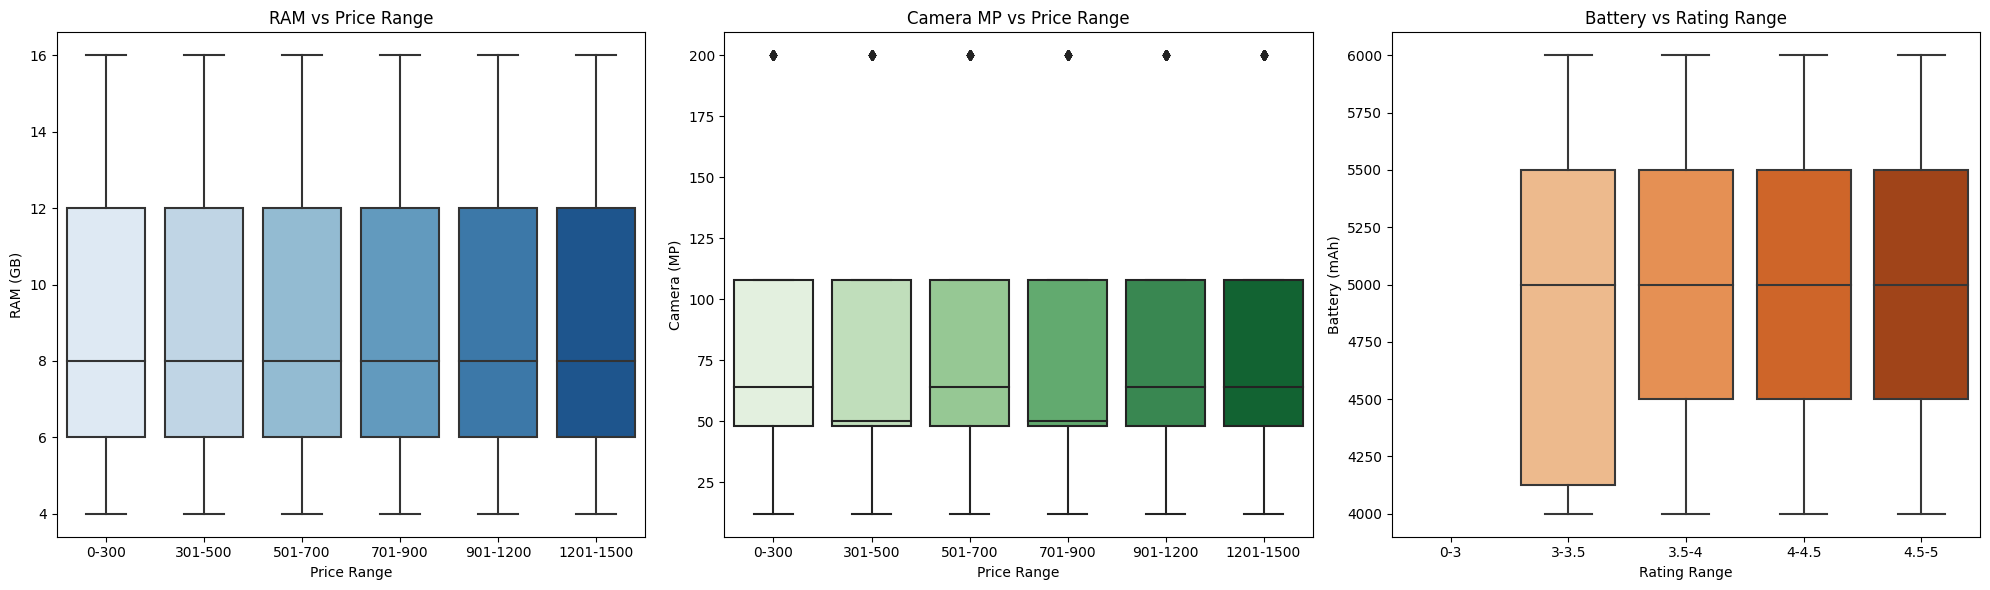

In [10]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Boxplot: RAM vs Price Range
sns.boxplot(x='price_range', y='ram_gb', data=df, ax=axes[0], palette="Blues")
axes[0].set_title("RAM vs Price Range")
axes[0].set_xlabel("Price Range")
axes[0].set_ylabel("RAM (GB)")

# Boxplot: Camera vs Price Range
sns.boxplot(x='price_range', y='camera_mp', data=df, ax=axes[1], palette="Greens")
axes[1].set_title("Camera MP vs Price Range")
axes[1].set_xlabel("Price Range")
axes[1].set_ylabel("Camera (MP)")

# Boxplot: Battery vs Rating Range
sns.boxplot(x='rating_range', y='battery_mah', data=df, ax=axes[2], palette="Oranges")
axes[2].set_title("Battery vs Rating Range")
axes[2].set_xlabel("Rating Range")
axes[2].set_ylabel("Battery (mAh)")

plt.tight_layout()
plt.show()


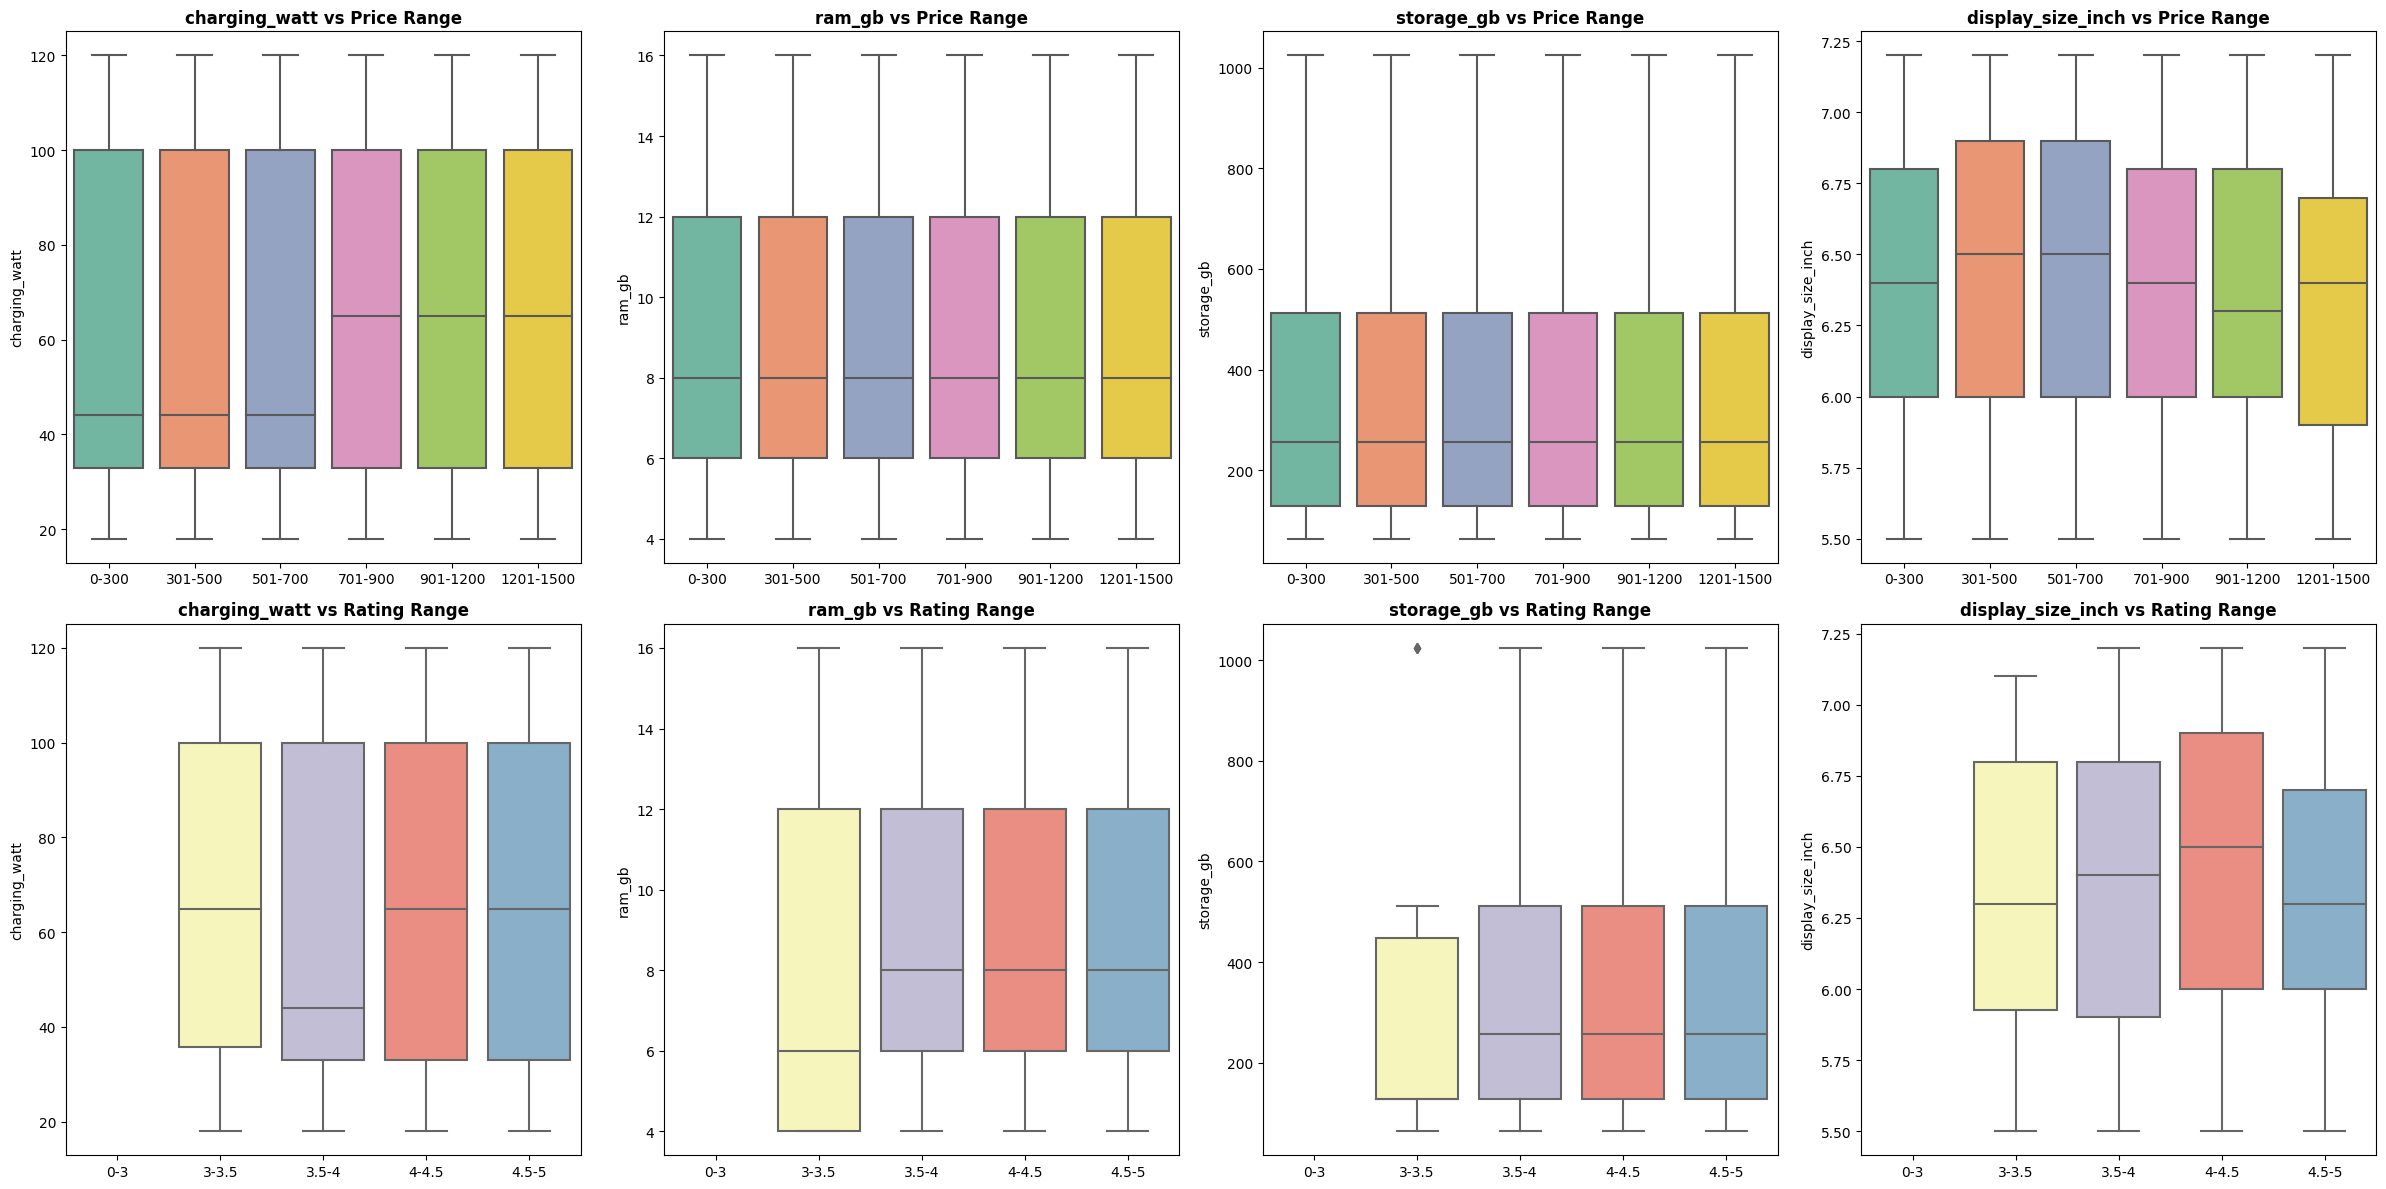

In [11]:
# Features to compare
features = ['charging_watt', 'ram_gb', 'storage_gb', 'display_size_inch']

# Create a 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(24,12))

# Compare features with price_range
for i, feature in enumerate(features):
    sns.boxplot(x='price_range', y=feature, data=df, ax=axes[0,i], palette="Set2")
    axes[0,i].set_title(f"{feature} vs Price Range", fontsize=12, fontweight='bold')
    axes[0,i].set_xlabel("")
    axes[0,i].set_ylabel(feature)

# Compare features with rating_range
for i, feature in enumerate(features):
    sns.boxplot(x='rating_range', y=feature, data=df, ax=axes[1,i], palette="Set3")
    axes[1,i].set_title(f"{feature} vs Rating Range", fontsize=12, fontweight='bold')
    axes[1,i].set_xlabel("")
    axes[1,i].set_ylabel(feature)

plt.tight_layout()
plt.show()

### 📶 4G vs 5G Analysis  

Comparing **4G** and **5G** support with **🏷️ Price** and **⭐ Rating**.


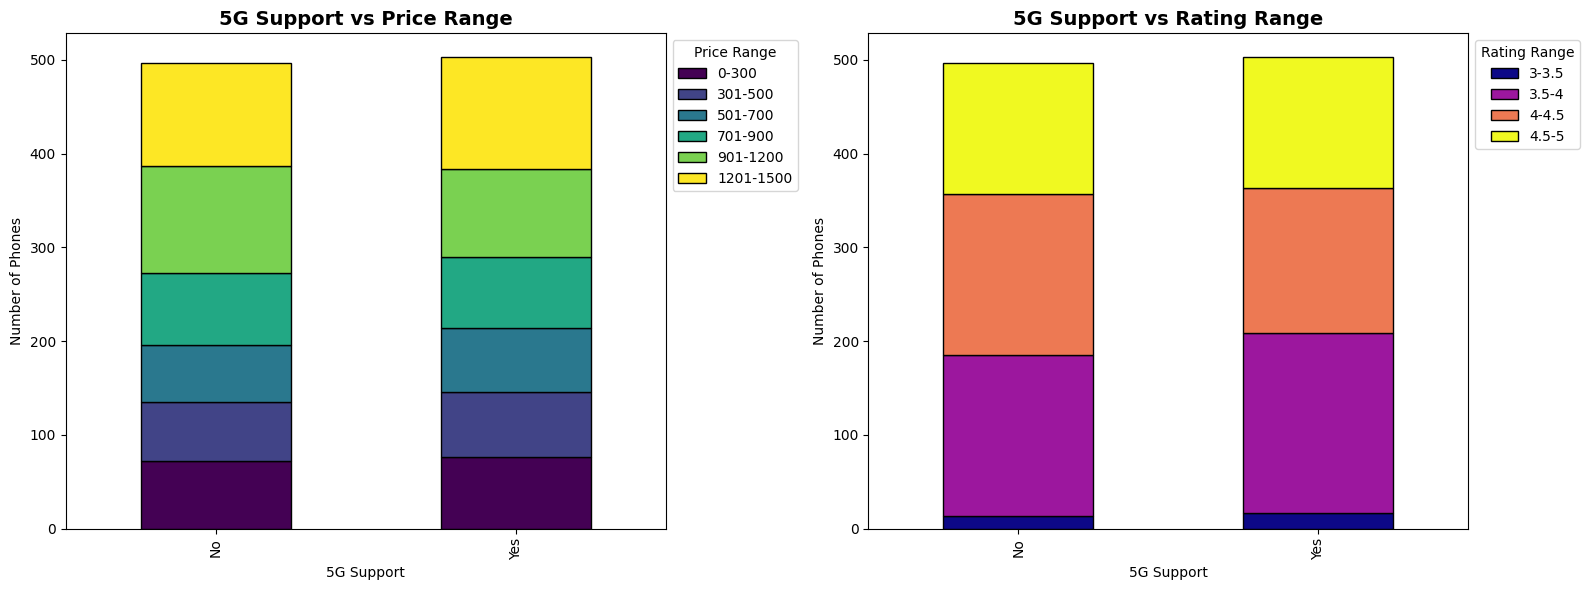

In [12]:
# Crosstab: 5G vs Price Range
price_5g = pd.crosstab(df['5g_support'], df['price_range'])

# Crosstab: 5G vs Rating Range
rating_5g = pd.crosstab(df['5g_support'], df['rating_range'])

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# 1️⃣ 5G vs Price Range
price_5g.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis', edgecolor='black')
axes[0].set_title("5G Support vs Price Range", fontsize=14, fontweight='bold')
axes[0].set_xlabel("5G Support")
axes[0].set_ylabel("Number of Phones")
axes[0].legend(title="Price Range", bbox_to_anchor=(1,1))

# 2️⃣ 5G vs Rating Range
rating_5g.plot(kind='bar', stacked=True, ax=axes[1], colormap='plasma', edgecolor='black')
axes[1].set_title("5G Support vs Rating Range", fontsize=14, fontweight='bold')
axes[1].set_xlabel("5G Support")
axes[1].set_ylabel("Number of Phones")
axes[1].legend(title="Rating Range", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()



### 🕒 Time-based Analysis  

Analyze **release_month** or **year** to see trends.  


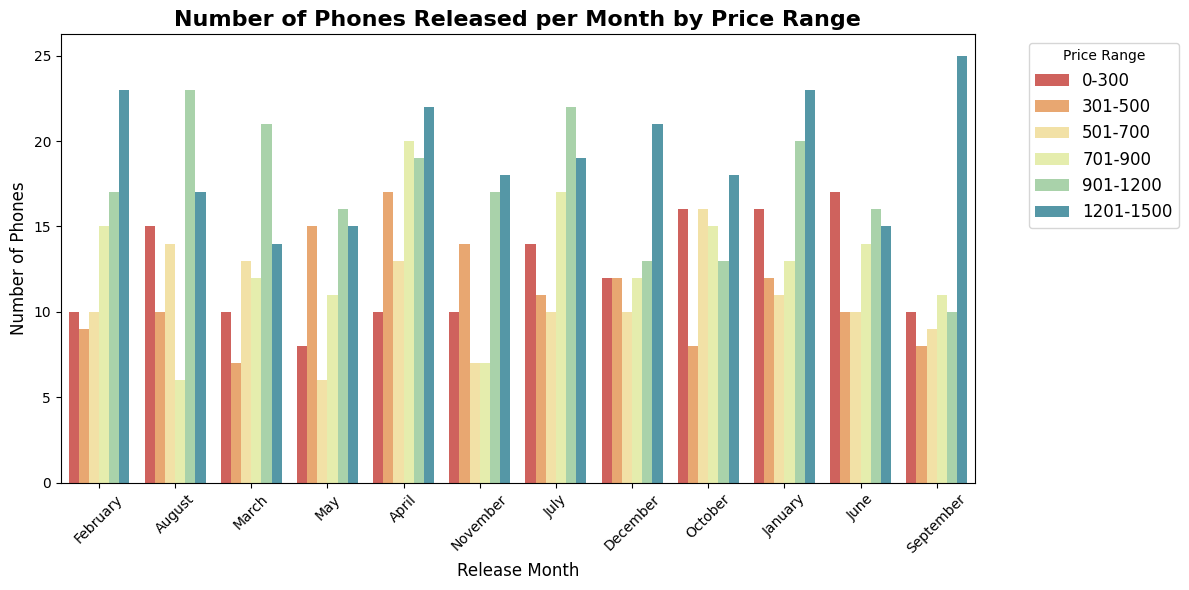

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_month', hue='price_range', data=df, palette="Spectral")

plt.title("Number of Phones Released per Month by Price Range", fontsize=16, fontweight='bold')
plt.xlabel("Release Month", fontsize=12)
plt.ylabel("Number of Phones", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Price Range", bbox_to_anchor=(1.05, 1), fontsize=12)
plt.tight_layout()
plt.show()


### 🔀 Combined Analysis  

**🏷️ Price Range vs ⭐ Rating Range Cross-Tab:**  
See which price ranges tend to have higher ratings.


In [14]:
pd.crosstab(df['price_range'], df['rating_range'], normalize='index')


rating_range,3-3.5,3.5-4,4-4.5,4.5-5
price_range,,,,
0-300,0.027027,0.337838,0.378378,0.256757
301-500,0.022556,0.338346,0.390977,0.248120
501-700,0.038760,0.372093,0.317829,0.271318
701-900,0.006536,0.379085,0.313725,0.300654
901-1200,0.028986,0.371981,0.323671,0.275362
1201-1500,0.047826,0.373913,0.269565,0.308696


### 📊 Stacked bars show the proportion of ratings within each price range.
### 🌈 Different colors from the Spectral colormap represent each rating range distinctly.


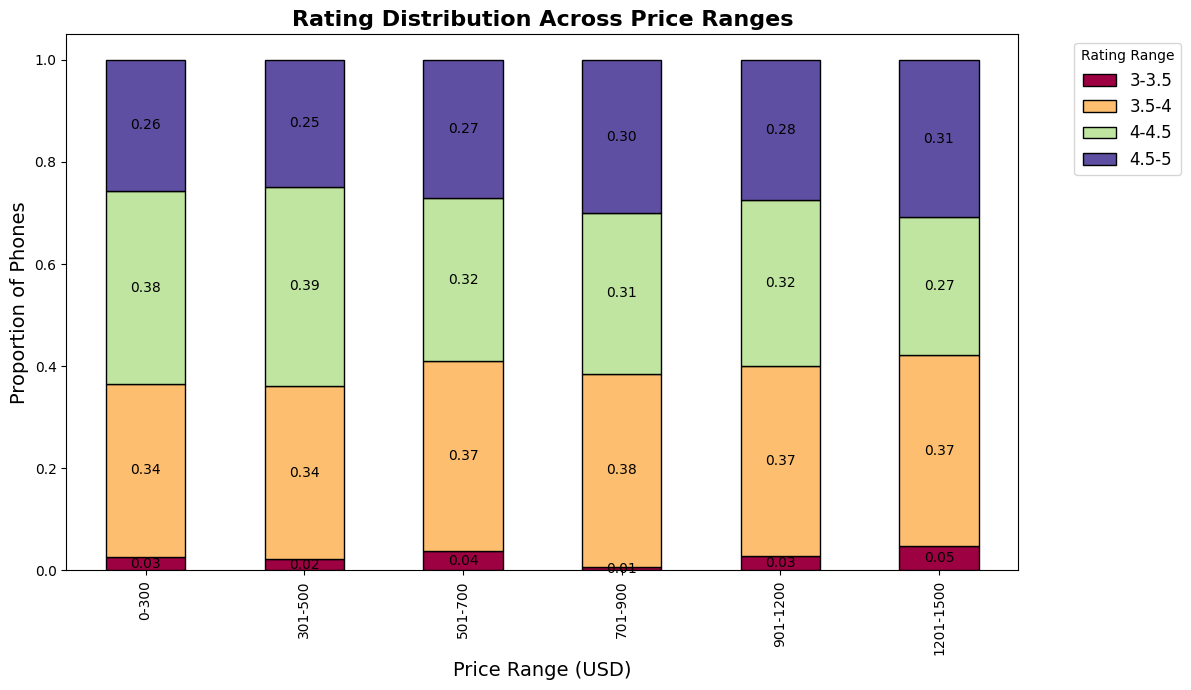

In [15]:
# Create the crosstab (normalized by row)
price_rating = pd.crosstab(df['price_range'], df['rating_range'], normalize='index')

# Plot stacked bar chart
price_rating.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Spectral', edgecolor='black')

# Add labels and title
plt.title("Rating Distribution Across Price Ranges", fontsize=16, fontweight='bold')
plt.xlabel("Price Range (USD)", fontsize=14)
plt.ylabel("Proportion of Phones", fontsize=14)

# Move legend outside
plt.legend(title="Rating Range", bbox_to_anchor=(1.05,1), fontsize=12)

# Add percentage labels on each segment
for i, price in enumerate(price_rating.index):
    bottom = 0
    for j, rating in enumerate(price_rating.columns):
        value = price_rating.loc[price, rating]
        if value > 0:
            plt.text(i, bottom + value/2, f"{value:.2f}", ha='center', va='center', color='black', fontsize=10)
            bottom += value

plt.tight_layout()
plt.show()



<div style="font-family: 'Arial', sans-serif; line-height: 1.6; color: #333; max-width: 800px; margin: auto;">

  <!-- Title -->
  <h1 style="text-align:center; color:#2c3e50;">📱 Mobile Phones Analysis & Recommendations</h1>
  <hr style="border:1px solid #ddd; margin-bottom:20px;">

  <!-- Key Findings -->
  <h2 style="color:#16a085;">🔹 Key Findings</h2>
  <ul style="list-style-type: disc; padding-left: 20px;">
    <li>Most phones have ratings between <strong>3.5 – 4</strong>.</li>
    <li>Majority of phones are priced <strong>1200–1500 USD</strong>, but <strong>700–900 USD phones</strong> mostly have ratings above 4.</li>
    <li><strong>Battery ≥4500 mAh</strong> leads to higher ratings; below 4500 mAh often results in lower ratings. 🔋</li>
    <li>Phones with <strong>RAM &lt;8 GB</strong> and <strong>storage &lt;256 GB</strong> tend to receive lower ratings. 💾</li>
    <li><strong>Charging wattage ≥45W</strong> improves user experience and ratings. ⚡</li>
  </ul>

  <!-- Recommendations -->
  <h2 style="color:#2980b9;">🔹 Recommendations</h2>
  <ul style="list-style-type: square; padding-left: 20px;">
    <li>Ensure <strong>battery ≥4500 mAh</strong>, <strong>RAM ≥8 GB</strong>, <strong>storage ≥256 GB</strong>, and <strong>charging ≥45W</strong>.</li>
    <li>Focus on <strong>mid-range phones (700–900 USD)</strong> for high ratings and ROI.</li>
    <li>Highlight <strong>battery life, fast charging, and storage/RAM</strong> in marketing campaigns.</li>
  </ul>

  <!-- Conclusion -->
  <h2 style="color:#e67e22;">🔹 Conclusion</h2>
  <p>
    User ratings are strongly influenced by <strong>battery, RAM, storage, and charging speed</strong>. 
    Optimizing these features, especially in mid-range phones, can <strong>boost satisfaction and market competitiveness</strong>.
  </p>

</div>


<div style="font-family: 'Arial', sans-serif; max-width: 800px; margin: auto; padding: 20px; border: 2px solid #ddd; border-radius: 12px; background: #f9f9f9; text-align: center; box-shadow: 0 4px 10px rgba(0,0,0,0.1);">

  <h2 style="color:#2c3e50;">👍 If you found this analysis helpful, give it a vote!</h2>
  
  <p style="font-size:16px; color:#555;">
    📝 Notice any issue or want to explore further analysis?  
    Feel free to leave your feedback or suggestions.  
  </p>
  
  <div style="margin-top:20px;">
    <a href="#" style="text-decoration:none; padding:12px 25px; background-color:#16a085; color:white; font-weight:bold; border-radius:8px; margin-right:10px;">Vote 👍</a>
    <a href="#" style="text-decoration:none; padding:12px 25px; background-color:#e67e22; color:white; font-weight:bold; border-radius:8px;">Feedback ✍️</a>
  </div>

  <p style="font-size:14px; color:#999; margin-top:15px;">Your support and feedback help improve the analysis! 🌟</p>

</div>
